This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [165]:
using LinearAlgebra
using Plots

In [166]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [167]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [168]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [169]:
n=5
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([-3.403865895582657 1.253896651488231 … -0.7712402970612948 0.060304483207800574; 0.039372595690516515 -2.177037535915828 … 0.23377829614603962 -1.6530099295785567; … ; 0.5413289006829494 -0.08816545266382707 … -1.6223888623190281 1.2962830882591447; -0.3077372744163543 0.6897614192792392 … -0.6682566668037537 0.18505742081502308], [1.4296179806553677 0.4081949218636313 … -0.5608158312184633 0.0; 1.0858330266705e-311 1.3422893738525137 … 0.6052865399344166 0.0; … ; 1.085810256734e-311 1.0858277778435e-311 … 1.3825837570650303 0.0; 1.085813466082e-311 1.085813381814e-311 … 1.085832623608e-311 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([3.1666361596934705 0.7529488398942664 … -0.24613627868247023 0.09684670472797802; 0.0690063708353914 -1.2660202465986192 … -0.22955915950911798 -0.1595270345491696; … ; -0.5193791746401029 -0.5301306547845067 … 0.917532754325253 0.6271630709229514; 0.5

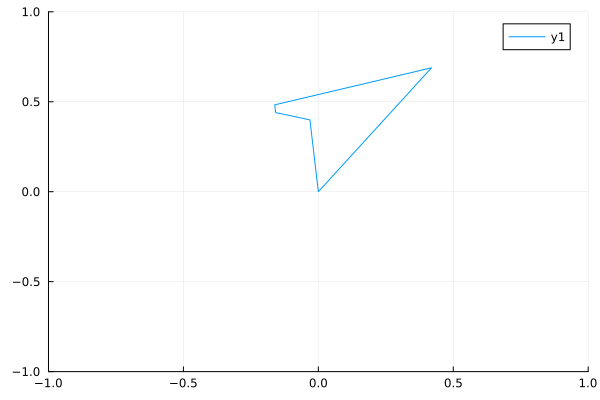

In [170]:
points=draw(E1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

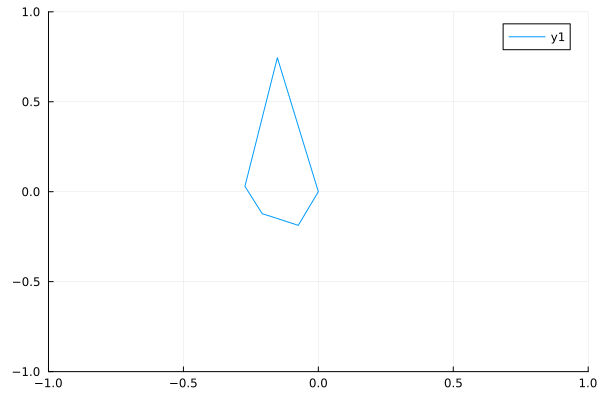

In [171]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

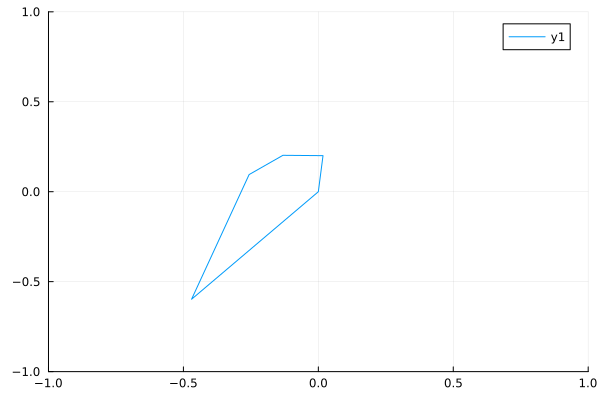

In [172]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1, n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])